In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-07-22 16:28:22 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-07-22 16:28:22 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-07-22 16:28:22 __main__ INFO     transformers.__version__='4.51.3'


In [3]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

[2025-07-22 16:28:25,278] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2025-07-22 16:28:25 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmpfhah2xco/test.c -o /tmp/tmpfhah2xco/test.o
2025-07-22 16:28:25 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmpfhah2xco/test.o -laio -o /tmp/tmpfhah2xco/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-22 16:28:25 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmphskhnicw/test.c -o /tmp/tmphskhnicw/test.o
2025-07-22 16:28:25 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmphskhnicw/test.o -L/usr -L/usr/lib64 -lcufile -o /tmp/tmphskhnicw/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-22 16:28:26 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-22 16:28:26 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-22 16:28:27 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-07-22 16:28:27 wandb.docker.auth DEBUG    No config file found


In [4]:
# os.environ["BNB_CUDA_VERSION"] = "124"
# ! echo $BNB_CUDA_VERSION
# ! python -m bitsandbytes

In [5]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
)

2025-07-22 16:28:27 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-07-22 16:28:27 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443
2025-07-22 16:28:27 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-07-22 16:28:27 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-07-22 16:29:16 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-07-22 16:29:16 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [6]:
from src.functional import free_gpu_cache

# SYNTH_DATASET = "icosahedron_1"
SYNTH_DATASET = "64"

checkpoint_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "trained_params",
    f"{SYNTH_DATASET}",
    "_full__clamp=0.001",
    model_key.split("/")[-1],
)

version = "epoch_1"
# version = "final_model"

checkpoint_path = os.path.join(env_utils.DEFAULT_RESULTS_DIR, checkpoint_path, version)

print(os.listdir(checkpoint_path))

checkpoint_path = os.path.join(checkpoint_path, "trainable_params.pt")

loaded_deltas = torch.load(checkpoint_path, map_location="cpu")
# loaded_deltas

free_gpu_cache()


d = loaded_deltas["model<>layers<>10<>mlp<>gate_proj"]
d.abs().max()

['trainable_params.pt']


tensor(0.0010, dtype=torch.bfloat16, grad_fn=<MaxBackward1>)

In [7]:
from src.utils.training_utils import TrainableLM_delta, TrainableLM_LoRA

#################################################
Trainable_CLS = TrainableLM_delta
# Trainable_CLS = TrainableLM_LoRA
#################################################

Trainable_CLS.fuse_with_model(mt._model, loaded_deltas)

2025-07-22 16:29:30 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-22 16:29:30 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-22 16:29:30 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-22 16:29:30 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-22 16:29:30 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-22 16:29:30 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-22 16:29:30 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
202

In [8]:
from src.selection.data  import load_people_by_category

people_by_category = load_people_by_category(tokenizer = mt.tokenizer)
list(people_by_category.keys())

2025-07-22 16:29:36 src.selection.data INFO     Loaded 16 categories


['actor',
 'singer',
 'comedian',
 'director',
 'basketball player',
 'football player',
 'soccer player',
 'tennis player',
 'golfer',
 'boxer',
 'news anchor',
 'journalist',
 'author',
 'fashion designer',
 'entrepreneur',
 'politician']

## Patching the predictive tokens

### Testing

In [ ]:
WINDOW_SPEC = {
    mt.layer_name_format: 1,
    mt.mlp_module_name_format: 9,
    mt.attn_module_name_format: 9,
}
module_name_format = mt.layer_name_format
# module_name_format = mt.mlp_module_name_format
# module_name_format = mt.attn_module_name_format

In [ ]:
from src.functional import generate_with_patch
from src.selection.data import get_random_sample
import random

######################################################################
n_distractors = 5
######################################################################

patch_sample_1 = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    obj_idx = 3,
    get_alt_obj=True,
)



patch_sample_2 = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=True,
    exclude_distractor_categories=[patch_sample_1.metadata["category"]]
)

patch_prompt = (
    patch_sample_1.prompt + f" {patch_sample_1.obj}" + "\n\n" + patch_sample_2.prompt
)

print(patch_prompt, " >> ", patch_sample_2.obj)

patch_gen = generate_with_patch(
    mt=mt,
    inputs=patch_prompt,
    max_new_tokens=30,
    n_gen_per_prompt=1,
    do_sample=False,
    remove_prefix=True,
)[0].split("\n")[0].strip()

print(f'"{patch_gen}"')

In [ ]:
# patch_prompt = """Which person from the following list has the profession in common with Michael Jordan?
# Options: Barack Obama, Tom Brady, Sachin Tendulkar, Roger Federer, Kobe Bryant, Rowan Atkinson.
# Ans: Kobe Bryant

# Which person from the following list has the profession in common with Scarlett Johansson?
# Cristiano Ronaldo, Tom Cruise, Peyton Manning, LeBron James, Leonardo da Vinci, Frank Sinatra.
# Ans:"""

In [ ]:
from src.tokens import prepare_input, find_token_range

patch_input = prepare_input(
    tokenizer=mt,
    prompts=patch_prompt,
    return_offsets_mapping=True
)

offsets = patch_input.pop("offset_mapping")[0]

first_ans_range = find_token_range(
    string = patch_prompt,
    substring="Ans:",
    tokenizer=mt,
    offset_mapping=offsets,
    occurrence=0
) 
print(f"First answer range: {first_ans_range}, {mt.tokenizer.decode(patch_input['input_ids'][0][first_ans_range[0]:first_ans_range[1]])}")

In [ ]:
patch_sample_1.metadata["alt_obj"], patch_sample_2.metadata["alt_obj"]

In [ ]:
##############################################################
clean_prof = random.choice(
    list(
        set(people_by_category.keys())
        - {patch_sample_1.metadata["category"], patch_sample_2.metadata["category"]}
    )
)

clean_obj_pos = random.choice(
    [idx for idx in range(n_distractors) if idx != patch_sample_1.obj_idx]
)
patch_type_pos = random.choice(
    list(
        set(list(range(0, n_distractors)))
        - {
            patch_sample_1.obj_idx,
            clean_obj_pos,
        }
    )
)
##############################################################

clean_sample_1 = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=False,
    exclude_objs=[patch_sample_1.obj, patch_sample_1.metadata["alt_obj"][0]],
    exclude_distractor_categories=[
        patch_sample_1.metadata["category"],
        patch_sample_2.metadata["category"],
        clean_prof,
    ],
)

clean_sample_2 = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=False,
    obj_idx=clean_obj_pos,
    category=clean_prof,
    exclude_objs=[
        patch_sample_1.obj,
        patch_sample_1.metadata["alt_obj"][0],
        clean_sample_1.obj,
    ],
    exclude_distractor_categories=[
        patch_sample_1.metadata["category"],
        patch_sample_2.metadata["category"],
        clean_sample_1.metadata["category"],
    ],
    insert_distractor=[(patch_sample_1.metadata["alt_obj"][0], patch_type_pos)],
)


clean_prompt = (
    clean_sample_1.prompt + f" {clean_sample_1.obj}" + "\n\n" + clean_sample_2.prompt
)

print(clean_prompt, " >> ", clean_sample_2.obj)

In [ ]:
patch_sample_1.metadata["alt_obj"][0]

In [ ]:
# clean_prompt = """Which person from the following list has the profession in common with George Kambosos Jr.?
# Options: Denis Villeneuve, Jerry Seinfeld, T.J. Watt, Tyson Fury, Scottie Scheffler, Brad Pitt.
# Ans: Tyson Fury

# Which person from the following list has the profession in common with Taylor Swift?
# Options: Tiffany Haddish, Justin Bieber, Tim Burton, LeBron James, Leonardo da Vinci, David Muir.
# Ans:"""

In [ ]:
clean_input = prepare_input(
    tokenizer=mt,
    prompts=clean_prompt,
    return_offsets_mapping=True,
)

clean_offsets = clean_input.pop("offset_mapping")[0]
pred_ans_range = find_token_range(
    string=clean_prompt,
    substring="Ans:",
    tokenizer=mt,
    offset_mapping=clean_offsets,
    occurrence=-1

)
print(f"Pred answer range: {pred_ans_range}, {mt.tokenizer.decode(clean_input['input_ids'][0][pred_ans_range[0]:pred_ans_range[1]])}")

clean_gen = generate_with_patch(
    mt=mt,
    inputs=clean_input,
    max_new_tokens=30,
    n_gen_per_prompt=1,
    do_sample=False,
    remove_prefix=True,
)[0].split("\n")[0].strip()

print(f'"{clean_gen}"')

In [ ]:
print(first_ans_range, pred_ans_range)
pad_len = pred_ans_range[1] - first_ans_range[1]

from src.tokens import insert_padding_before_pos

patch_input_2 = insert_padding_before_pos(
    inp=patch_input,
    token_position=0,
    pad_len=pad_len,
    pad_id=mt.tokenizer.pad_token_id,
    fill_attn_mask=False,
)

print(
    f"\"{mt.tokenizer.decode(clean_input['input_ids'][0][pred_ans_range[0]:pred_ans_range[1]])}\""
)
print(
    f"\"{mt.tokenizer.decode(patch_input_2['input_ids'][0][pred_ans_range[0]:pred_ans_range[1]])}\""
)
patch_input_2.input_ids.shape

In [ ]:
from src.functional import get_hs, interpret_logits
from src.utils.typing import TokenizerOutput
from itertools import product

modules = [module_name_format.format(layer_idx) for layer_idx in range(mt.n_layer)]
pred_indices = list(range(*pred_ans_range))
locations = list(product(modules, pred_indices))
logit_location = (mt.lm_head_name, -1)


patch_hs = get_hs(
    mt=mt, input=patch_input_2, locations=locations + [logit_location], return_dict=True
)

logit = patch_hs[logit_location]
pred = interpret_logits(logits=logit, tokenizer=mt)
pred

In [ ]:
from src.selection.utils import get_first_token_id

obj_track = {
    "corrupt": patch_sample_1.obj,
    "clean": clean_sample_2.obj,
    "pointer": clean_sample_2.options[patch_sample_1.obj_idx],
    "patch_type": patch_sample_1.metadata["alt_obj"][0],
    "position_vector": clean_sample_1.obj,
    "none": "None",
}

rand = random.choice(
    list(set(clean_sample_2.options) - set(obj_track.values()))
)

obj_track["rand"] = rand

for obj_type in obj_track:
    obj = obj_track[obj_type]
    obj_id = get_first_token_id(obj, mt.tokenizer, prefix=" ")
    obj_track[obj_type] = {
        "id": obj_id,
        "token": mt.tokenizer.decode(obj_id),
        "name": obj,
    }

obj_track

In [ ]:
mt.tokenizer.decode(patch_input_2["input_ids"][0][range(*pred_ans_range)])

In [ ]:
from src.functional import PatchSpec
from src.trace import get_window


interested_tokens = [obj["id"] for obj in obj_track.values()]

patching_results = {}
for layer_idx in range(mt.n_layer):
    patches = []
    for tok_idx in range(*pred_ans_range):
        patches.extend(
            [
                PatchSpec(
                    location=(module_name, tok_idx),
                    patch=patch_hs[(module_name, tok_idx)],
                    strategy="replace",
                )
                for module_name in get_window(
                    module_name_format,
                    idx=layer_idx,
                    window_size=WINDOW_SPEC[mt.layer_name_format],
                    n_layer=mt.n_layer,
                )
            ]
        )
    int_logit = get_hs(
        mt=mt,
        input=clean_input,
        patches=patches,
        locations=[logit_location],
        return_dict=False,
    ).squeeze(0)

    pred, track = interpret_logits(
        logits=int_logit,
        tokenizer=mt,
        interested_tokens=interested_tokens,
    )
    patching_results[module_name_format.format(layer_idx)] = {"pred": pred, "track": track}
    print(f"{module_name_format.format(layer_idx)}: {[str(p) for p in pred]}, | track: {track}")

In [ ]:
from matplotlib import pyplot as plt

METRIC = "logit"
scores = {obj_type: [] for obj_type in obj_track.keys()}
colors = {
    "corrupt": "red",
    "clean": "green",
    "pointer": "blue",
    "patch_type": "orange",
    "position_vector": "purple",
    "rand": "black",
    "none": "gray",
}

for layer_name, result in patching_results.items():
    track = result["track"]
    for obj_type in obj_track.keys():
        tok_id = obj_track[obj_type]["id"]
        s = getattr(track[tok_id][1], METRIC)
        scores[obj_type].append(s)

xkeys = list(patching_results.keys())
plt.figure(figsize=(18, 6))

for key in scores:
    plt.plot(xkeys, scores[key], label=key, marker='o', markersize=3, color=colors[key])


plt.xticks(rotation=90)
plt.xlabel("Layer")
plt.ylabel("Logit Score")

plt.legend(ncols=len(scores), loc="upper center", bbox_to_anchor=(0.5, 1.15))

plt.show()

In [ ]:
# **scale up**
from src.selection.data import (
    SelectionPatchingResult_Multi,
    ObjectwiseResult,
    LayerwiseResult,
)
from src.utils import experiment_utils
from src.tokens import insert_padding_before_pos

# SELECT ONE TASK
prompt_template = """Which person from the following list has the profession in common with {}?
{}.
Ans:"""

##################################################################################################
N_RUNS = 100
N_DISTRACTORS = 5
SAVE_DIR = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    mt.name.split("/")[-1],
    "patching_results",
    "predictive_tokens",
)

FILE_NAME_SPEC = {
    mt.layer_name_format: "residual",
    mt.mlp_module_name_format: "mlp",
    mt.attn_module_name_format: "attn",
}

file_suffix = ".json"
file_suffix = "_multi_aligned" + file_suffix
for key in FILE_NAME_SPEC:
    FILE_NAME_SPEC[key] += file_suffix

WINDOW_SPEC = {
    mt.layer_name_format: 1,
    mt.mlp_module_name_format: 5,
    mt.attn_module_name_format: 9,
}
module_name_format = mt.layer_name_format
# module_name_format = mt.mlp_module_name_format
# module_name_format = mt.attn_module_name_format

save_step = 50

locations = [(layer_name, -1) for layer_name in mt.layer_names]
logit_location = (mt.lm_head_name, -1)
layer_step = 1
##################################################################################################

experiment_utils.set_seed(123456)

os.makedirs(SAVE_DIR, exist_ok=True)
run_idx = 0
patching_results = []

while run_idx < N_RUNS:
    run_idx += 1
    logger.info("#" * 100)
    logger.info(f"Run {run_idx}/{N_RUNS}")

    patch_sample_1 = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        obj_idx=random.choice(list(range(N_DISTRACTORS))),
        get_alt_obj=True,
    )

    patch_sample_2 = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        get_alt_obj=True,
        exclude_distractor_categories=[patch_sample_1.metadata["category"]],
    )

    patch_prompt = (
        patch_sample_1.prompt
        + f" {patch_sample_1.obj}"
        + "\n\n"
        + patch_sample_2.prompt
    )

    logger.info(f"patch_sample_1={str(patch_sample_1)}")
    logger.info(f"patch_sample_2={str(patch_sample_2)}")
    print(patch_prompt, " >> ", patch_sample_2.obj)
    logger.info("-" * 50)

    # Prepare patch input and find answer position
    patch_input = prepare_input(
        tokenizer=mt, prompts=patch_prompt, return_offsets_mapping=True
    )

    patch_offsets = patch_input.pop("offset_mapping")[0]
    first_ans_range = find_token_range(
        string=patch_prompt,
        substring="Ans:",
        tokenizer=mt,
        offset_mapping=patch_offsets,
        occurrence=0,
    )

    # Generate clean samples
    clean_prof = random.choice(
        list(
            set(people_by_category.keys())
            - {patch_sample_1.metadata["category"], patch_sample_2.metadata["category"]}
        )
    )

    clean_obj_pos = random.choice(
        [idx for idx in range(n_distractors) if idx != patch_sample_1.obj_idx]
    )
    patch_type_pos = random.choice(
        list(
            set(list(range(0, n_distractors)))
            - {
                patch_sample_1.obj_idx,
                clean_obj_pos,
            }
        )
    )

    clean_sample_1 = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        get_alt_obj=False,
        exclude_objs=[patch_sample_1.obj, patch_sample_1.metadata["alt_obj"][0]],
        exclude_distractor_categories=[
            patch_sample_1.metadata["category"],
            patch_sample_2.metadata["category"],
            clean_prof,
        ],
    )

    clean_sample_2 = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=n_distractors,
        get_alt_obj=False,
        obj_idx=clean_obj_pos,
        category=clean_prof,
        exclude_objs=[
            patch_sample_1.obj,
            patch_sample_1.metadata["alt_obj"][0],
            clean_sample_1.obj,
        ],
        exclude_distractor_categories=[
            patch_sample_1.metadata["category"],
            patch_sample_2.metadata["category"],
            clean_sample_1.metadata["category"],
        ],
        insert_distractor=[(patch_sample_1.metadata["alt_obj"][0], patch_type_pos)],
    )

    clean_prompt = (
        clean_sample_1.prompt
        + f" {clean_sample_1.obj}"
        + "\n\n"
        + clean_sample_2.prompt
    )

    logger.info(f"clean_sample_1={str(clean_sample_1)}")
    logger.info(f"clean_sample_2={str(clean_sample_2)}")
    print(clean_prompt, " >> ", clean_sample_2.obj)
    logger.info("-" * 50)

    # Prepare clean input
    clean_input = prepare_input(
        tokenizer=mt,
        prompts=clean_prompt,
        return_offsets_mapping=True,
    )

    #! adjust the `:` position such that patching_sample_1 aligns with the clean_sample_2
    clean_offsets = clean_input.pop("offset_mapping")[0]
    pred_ans_range = find_token_range(
        string=clean_prompt,
        substring="Ans:",
        tokenizer=mt,
        offset_mapping=clean_offsets,
        occurrence=-1,
    )
    print(
        f"Pred answer range: {pred_ans_range}, {mt.tokenizer.decode(clean_input['input_ids'][0][pred_ans_range[0]:pred_ans_range[1]])}"
    )
    pad_len = pred_ans_range[1] - first_ans_range[1]
    patch_input = insert_padding_before_pos(
        inp=patch_input,
        token_position=0,
        pad_len=pad_len,
        pad_id=mt.tokenizer.pad_token_id,
        fill_attn_mask=False,
    )
    first_ans_range = pred_ans_range
    #! ##################################################################################

    # the patching run to cache the states

    modules = [module_name_format.format(layer_idx) for layer_idx in range(mt.n_layer)]
    pred_indices = list(range(*pred_ans_range))
    locations = list(product(modules, pred_indices))
    logit_location = (mt.lm_head_name, -1)
    patch_hs = get_hs(
        mt=mt,
        input=patch_input,
        locations=locations,
        return_dict=True,
    )

    # Define object tracking (similar to previous blocks)
    obj_track = {
        "corrupt": patch_sample_1.obj,
        "clean": clean_sample_2.obj,
        "pointer": clean_sample_2.options[patch_sample_1.obj_idx],
        "patch_type": patch_sample_1.metadata["alt_obj"][0],
        "position_vector": clean_sample_1.obj,
        "none": "None",
    }

    rand = random.choice(list(set(clean_sample_2.options) - set(obj_track.values())))
    obj_track["rand"] = rand

    for obj_type in obj_track:
        obj = obj_track[obj_type]
        obj_id = get_first_token_id(obj, mt.tokenizer, prefix=" ")
        obj_track[obj_type] = {
            "id": obj_id,
            "token": mt.tokenizer.decode(obj_id),
            "name": obj,
        }

    interested_tokens = [obj["id"] for obj in obj_track.values()]

    # Perform patching interventions
    layerwise_patching_results = {}
    for layer_idx in range(0, mt.n_layer, layer_step):
        patches = []
        for tok_idx in range(*pred_ans_range):
            patches.extend(
                [
                    PatchSpec(
                        location=(module_name, tok_idx),
                        patch=patch_hs[(module_name, tok_idx)],
                        strategy="replace",
                    )
                    for module_name in get_window(
                        module_name_format,
                        idx=layer_idx,
                        window_size=WINDOW_SPEC[module_name_format],
                        n_layer=mt.n_layer,
                    )
                ]
            )
        int_logit = get_hs(
            mt=mt,
            input=clean_input,
            patches=patches,
            locations=[logit_location],
            return_dict=False,
        ).squeeze(0)

        pred, track = interpret_logits(
            logits=int_logit,
            tokenizer=mt,
            interested_tokens=interested_tokens,
        )

        objectwise_result = {}
        for obj_type in obj_track:
            obj_res = track[obj_track[obj_type]["id"]]
            objectwise_result[obj_type] = ObjectwiseResult(
                rank=obj_res[0], pred=obj_res[1]
            )
        layerwise_patching_results[module_name_format.format(layer_idx)] = LayerwiseResult(
            predictions=pred, objs=objectwise_result
        )
        logger.debug(f"{module_name_format.format(layer_idx)}: {[str(p) for p in pred]} | track: {track}")

    patch_sample_1.detensorize()
    patch_sample_2.detensorize()
    clean_sample_1.detensorize()
    clean_sample_2.detensorize()

    patching_results.append(
        SelectionPatchingResult_Multi(
            patch_sample_1=patch_sample_1,
            patch_sample_2=patch_sample_2,
            patch_prompt=patch_prompt,
            clean_sample_1=clean_sample_1,
            clean_sample_2=clean_sample_2,
            clean_prompt=clean_prompt,
            results=layerwise_patching_results,
        )
    )

    if run_idx % save_step == 0 or run_idx == N_RUNS:
        save_file = os.path.join(
            SAVE_DIR,
            f"{FILE_NAME_SPEC[module_name_format]}",
        )

        with open(save_file, "w") as f:
            json.dump(
                [run.to_dict() for run in patching_results],
                f,
                indent=2,
            )

    logger.info("#" * 100)

In [ ]:
patching_results[0].patch_sample_1.prediction

In [ ]:
patching_results[0].results[module_name_format.format(5)].objs

In [ ]:
print(patch_prompt)

In [ ]:
# run = patching_results[1]
# run.clean_sample.detensorize()
# run.patch_sample.detensorize()
# with open("run.json", "w") as f:
#     json.dump(run.to_dict(), f, indent=2)

In [ ]:
# with open("run.json", "r") as f:
#     run_data = json.load(f)
# run_ld = SelectionPatchingResult.from_dict(run_data)

In [ ]:
# for run in patching_results:
#     run.clean_sample.detensorize()
#     run.patch_sample.detensorize()

# with open("patching_results.json", "w") as f:
#     json.dump(
#         [run.to_dict() for run in patching_results],
#         f,
#         indent=2,
#     )

In [ ]:
from src.selection.data import SelectionPatchingResult_Multi


SAVE_DIR = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    mt.name.split("/")[-1],
    "patching_results",
    "predictive_tokens",
)


with open(os.path.join(
    SAVE_DIR, 
    # "patching_results_multi.json"), 
    "residual_multi_aligned.json"),
"r") as f:
    patching_results_ld = json.load(f)
patching_results_ld = [
    SelectionPatchingResult_Multi.from_dict(run) for run in patching_results_ld
]
len(patching_results_ld)

In [ ]:
#######################################################
patching_results = patching_results_ld
N_RUNS = len(patching_results)
#######################################################

In [ ]:
from matplotlib import pyplot as plt

##############################################
METRIC = "logit"
colors = {
    "corrupt": "crimson",
    "clean": "green",
    "pointer": "blue",
    "patch_type": "#FF4500",
    "position_vector": "purple",
    "rand": "black",
    "none": "gray",
}
##############################################

all_scores = {obj_type: [] for obj_type in colors.keys()}
x_keys = list(patching_results_ld[0].results.keys())
x_keys = [key.split(".")[-1] for key in x_keys]

def get_tick_labels(ticks, step=5):
    return [
        tick if (i % step == 0 or i == len(ticks) - 1) else ""
        for i, tick in enumerate(ticks)
    ]

for run in patching_results_ld:
    run_score = {obj_type: [] for obj_type in all_scores.keys()}
    for layer_name, result in run.results.items():
        track = result.objs
        for obj_type in run_score.keys():
            run_score[obj_type].append(
                getattr(track[obj_type].pred, METRIC)
            )
    for obj_type in all_scores.keys():
        all_scores[obj_type].append(run_score[obj_type])

for obj_type in all_scores.keys():
    all_scores[obj_type] = torch.tensor(all_scores[obj_type])

plt.figure(figsize=(18, 6))
for key in all_scores:
    plt.plot(
        x_keys,
        all_scores[key].mean(dim=0).numpy(),
        label=key,
        marker="o",
        markersize=3,
        color=colors[key],
        alpha=0.7 if key not in ["none", "rand"] else 0.4,
    )
    std_err = all_scores[key].std(dim=0).numpy() / (N_RUNS ** 0.5)
    plt.fill_between(
        x_keys,
        all_scores[key].mean(dim=0).numpy() - std_err,
        all_scores[key].mean(dim=0).numpy() + std_err,
        alpha=0.1,
        color=colors[key],
    )

plt.xticks(x_keys, labels=get_tick_labels(x_keys, step=3), rotation=0)
plt.xlabel("Layer")
plt.ylabel(f"{METRIC.capitalize()} Score")

plt.title(f"{mt.name.split('/')[-1]} - {module_name_format} - window_size={WINDOW_SPEC[module_name_format]}", pad=40)
plt.legend(ncols=len(all_scores), loc="upper center", bbox_to_anchor=(0.5, 1.10))

plt.show()

## Patching the Pivot Entity

In [9]:
######################################################################
N_DISTRACTORS = 5
WINDOW_SPEC = {
    mt.layer_name_format: 1,
    mt.mlp_module_name_format: 9,
    mt.attn_module_name_format: 9,
}
module_name_format = mt.layer_name_format
# module_name_format = mt.mlp_module_name_format
# module_name_format = mt.attn_module_name_format

######################################################################

In [10]:
import copy
import random
from src.selection.utils import KeyedSet, get_first_token_id
from src.selection.data import SelectionSample
from src.functional import predict_next_token

def get_counterfactual_samples_on_pivot_entity():
    patch_category = random.choice(list(people_by_category.keys()))
    patch_subj, patch_obj = random.sample(people_by_category[patch_category].values, 2)
    logger.info(
        f"Patch category: {patch_category}, subject: {patch_subj}, object: {patch_obj}"
    )

    clean_category = random.choice(
        list(set(people_by_category.keys()) - {patch_category})
    )
    clean_subj, clean_obj = random.sample(people_by_category[clean_category].values, 2)
    logger.info(
        f"Clean category: {clean_category}, subject: {clean_subj}, object: {clean_obj}"
    )

    distractors = []
    other_categories = random.sample(
        list(set(people_by_category.keys()) - {patch_category, clean_category}),
        k=N_DISTRACTORS - 1,
    )

    for other_category in other_categories:
        distractors.append(
            random.choice(
                (
                    people_by_category[other_category]
                    - KeyedSet(
                        [patch_obj, clean_obj] + distractors, tokenizer=mt.tokenizer
                    )
                ).values
            )
        )

    patch_options = [patch_obj, clean_obj] + distractors
    random.shuffle(patch_options)
    patch_obj_idx = patch_options.index(patch_obj)
    logger.info(f"{patch_obj_idx=} | {patch_options}")

    clean_options = copy.deepcopy(patch_options)
    while (
        clean_options.index(clean_obj) == patch_obj_idx
        or clean_options.index(patch_obj) == patch_obj_idx
    ):
        random.shuffle(clean_options)

    clean_obj_idx = clean_options.index(clean_obj)

    logger.info(f"{clean_obj_idx=} | {clean_options}")

    patch_sample = SelectionSample(
        subj=patch_subj,
        obj=patch_obj,
        obj_idx=patch_obj_idx,
        obj_token_id=get_first_token_id(patch_obj, mt.tokenizer, prefix=" "),
        options=patch_options,
        metadata={"category": patch_category},
    )
    clean_sample = SelectionSample(
        subj=clean_subj,
        obj=clean_obj,
        obj_idx=clean_obj_idx,
        obj_token_id=get_first_token_id(clean_obj, mt.tokenizer, prefix=" "),
        options=clean_options,
        metadata={
            "category": clean_category,
        },
    )

    for sample in [patch_sample, clean_sample]:
        pred = predict_next_token(
            mt=mt,
            inputs=sample.prompt,
        )[0]
        logger.info(f"{sample.subj} -> {sample.obj} | pred={[str(p) for p in pred]}")
        if pred[0].token_id != sample.obj_token_id:
            logger.error(
                f'Prediction mismatch: {pred[0].token_id}["{mt.tokenizer.decode(pred[0].token_id)}"] != {sample.obj_token_id}["{mt.tokenizer.decode(sample.obj_token_id)}"]'
            )
            return get_counterfactual_samples_on_pivot_entity()
        sample.prediction = pred

    return patch_sample, clean_sample


patch_sample_1, clean_sample_2 = get_counterfactual_samples_on_pivot_entity()
pointer_obj = clean_sample_2.options[patch_sample_1.obj_idx]
logger.info(f"Pointer object: {pointer_obj}")

2025-07-22 16:29:36 __main__ INFO     Patch category: director, subject: David Fincher, object: Coen Brothers
2025-07-22 16:29:36 __main__ INFO     Clean category: boxer, subject: Manny Pacquiao, object: Artur Beterbiev
2025-07-22 16:29:36 __main__ INFO     patch_obj_idx=5 | ['J.K. Rowling', 'Artur Beterbiev', 'Kevin Hart', 'Anthony Davis', 'Christiane Amanpour', 'Coen Brothers']
2025-07-22 16:29:36 __main__ INFO     clean_obj_idx=3 | ['Coen Brothers', 'Kevin Hart', 'J.K. Rowling', 'Artur Beterbiev', 'Anthony Davis', 'Christiane Amanpour']
2025-07-22 16:29:38 __main__ INFO     David Fincher -> Coen Brothers | pred=['" Co"[3623] (p=0.641, logit=19.500)', '" The"[578] (p=0.143, logit=18.000)', '" None"[2290] (p=0.067, logit=17.250)', '" Christian"[9052] (p=0.046, logit=16.875)', '" David"[6941] (p=0.014, logit=15.688)']
2025-07-22 16:29:38 __main__ INFO     Manny Pacquiao -> Artur Beterbiev | pred=['" Art"[5277] (p=0.719, logit=20.375)', '" Manny"[95255] (p=0.142, logit=18.750)', '" The"

In [11]:
from src.selection.data import get_random_sample

patch_sample_2 = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=N_DISTRACTORS,
    exclude_objs=[
        patch_sample_1.obj,
        clean_sample_2.obj,
        pointer_obj,
        patch_sample_1.subj,
    ],
    exclude_distractor_categories=[
        patch_sample_1.metadata["category"],
        clean_sample_2.metadata["category"],
    ],
)

clean_sample_1 = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=N_DISTRACTORS,
    exclude_objs=[
        patch_sample_1.obj,
        patch_sample_2.obj,
        clean_sample_2.obj,
        pointer_obj,
        clean_sample_2.subj,
    ],
    exclude_distractor_categories=[
        patch_sample_1.metadata["category"],
        clean_sample_2.metadata["category"],
        patch_sample_2.metadata["category"],
    ],
)

In [12]:
# align to make sure that the patch_sample_1.subj and clean_sample_2.subj has the same number of tokens
from src.tokens import align_patching_positions

aligned = align_patching_positions(
    mt=mt,
    prompt_template=" {}",
    clean_subj=clean_sample_2.subj,
    patched_subj=patch_sample_1.subj,
)

for clean_tok, patch_tok in zip(
    aligned["clean_input"]["input_ids"][0], aligned["patched_input"]["input_ids"][0]
):
    print(f'{mt.tokenizer.decode(clean_tok)} -> "{mt.tokenizer.decode(patch_tok)}"')

aligned_patch_subj = mt.tokenizer.decode(
    aligned["patched_input"]["input_ids"][0][range(*aligned["subj_range"])],
    skip_special_tokens=False,
)

aligned_clean_subj = mt.tokenizer.decode(
    aligned["clean_input"]["input_ids"][0][range(*aligned["subj_range"])],
    skip_special_tokens=False,
)

<|begin_of_text|> -> "<|begin_of_text|>"
 Manny -> "<|eot_id|>"
 Pac -> " David"
qu -> " Fin"
iao -> "cher"


In [13]:
from src.functional import generate_with_patch

patch_prompt = (
    patch_sample_1.prompt + f" {patch_sample_1.obj}" + "\n\n" + patch_sample_2.prompt
)
patch_prompt = patch_prompt.replace(
    " " + patch_sample_1.subj, aligned_patch_subj
)

print(patch_prompt, " >> ", patch_sample_2.obj)

patch_gen = generate_with_patch(
    mt=mt,
    inputs=patch_prompt,
    max_new_tokens=30,
    n_gen_per_prompt=1,
    do_sample=False,
    remove_prefix=True,
)[0].split("\n")[0].strip()

print(f'"{patch_gen}"')

Which person from the following list has the profession in common with<|eot_id|> David Fincher?
Options: J.K. Rowling, Artur Beterbiev, Kevin Hart, Anthony Davis, Christiane Amanpour, Coen Brothers
Ans: Coen Brothers

Which person from the following list has the profession in common with Pete Davidson?
Options: Andrey Rublev, Ali Wong, Hillary Clinton, Chris Hemsworth, Tom Ford, Beyoncé
Ans:  >>  Ali Wong


/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


"Ali Wong"


In [14]:
clean_prompt = (
    clean_sample_1.prompt + f" {clean_sample_1.obj}" + "\n\n" + clean_sample_2.prompt
)
clean_prompt = clean_prompt.replace(" " + clean_sample_2.subj, aligned_clean_subj)

print(clean_prompt, " >> ", clean_sample_2.obj)

clean_gen = (
    generate_with_patch(
        mt=mt,
        inputs=clean_prompt,
        max_new_tokens=30,
        n_gen_per_prompt=1,
        do_sample=False,
        remove_prefix=True,
    )[0]
    .split("\n")[0]
    .strip()
)

print(f'"{clean_gen}"')

clean_pred = predict_next_token(
    mt=mt,
    inputs=clean_prompt,
)[0]

assert (
    clean_pred[0].token_id == clean_sample_2.obj_token_id
), f'Prediction mismatch: {clean_pred[0].token_id}["{mt.tokenizer.decode(clean_pred[0].token_id)}"] != {clean_sample_2.obj_token_id}["{mt.tokenizer.decode(clean_sample_2.obj_token_id)}"]'

Which person from the following list has the profession in common with James Harden?
Options: Kevin McCarthy, David Muir, Denzel Washington, Russell Wilson, Antoine Griezmann, Zion Williamson
Ans: Zion Williamson

Which person from the following list has the profession in common with Manny Pacquiao?
Options: Coen Brothers, Kevin Hart, J.K. Rowling, Artur Beterbiev, Anthony Davis, Christiane Amanpour
Ans:  >>  Artur Beterbiev
"Artur Beterbiev"


In [15]:
from itertools import product
from src.tokens import prepare_input, find_token_range
from src.functional import get_hs

# cache the latents

patch_tokenized = prepare_input(
    tokenizer=mt.tokenizer,
    prompts=patch_prompt,
    return_offsets_mapping=True,
)
patch_offsets = patch_tokenized.pop("offset_mapping")[0]
patch_subj_range = find_token_range(
    string=patch_prompt,
    substring=aligned_patch_subj,
    tokenizer=mt.tokenizer,
    offset_mapping=patch_offsets,
    occurrence=0,
)
patch_subj_range = (
    patch_subj_range[0] + 1,  # +1 to skip added token for the space
    patch_subj_range[1],
)
print(
    f"Patch subject range: {patch_subj_range}, \"{mt.tokenizer.decode(patch_tokenized['input_ids'][0][patch_subj_range[0]:patch_subj_range[1]])}\""
)


modules = [module_name_format.format(layer_idx) for layer_idx in range(mt.n_layer)]
locations = list(product(modules, range(*patch_subj_range)))
logit_location = (mt.lm_head_name, -1)

patch_hs = get_hs(
    mt=mt,
    input=patch_tokenized,
    locations=locations + [logit_location],
    return_dict=True,
)

Patch subject range: (13, 17), "<|eot_id|> David Fincher"


In [16]:
clean_tokenized = prepare_input(
    tokenizer=mt.tokenizer,
    prompts=clean_prompt,
    return_offsets_mapping=True,
)
clean_offsets = clean_tokenized.pop("offset_mapping")[0]
clean_subj_range = find_token_range(
    string=clean_prompt,
    substring=aligned_clean_subj,
    tokenizer=mt.tokenizer,
    offset_mapping=clean_offsets,
    occurrence=0,
)
clean_subj_range = (
    clean_subj_range[0] + 1,  # +1 to skip added token for the space
    clean_subj_range[1],
)

print(
    f"Clean subject range: {clean_subj_range}, \"{mt.tokenizer.decode(clean_tokenized['input_ids'][0][clean_subj_range[0]:clean_subj_range[1]])}\""
)

Clean subject range: (58, 62), " Manny Pacquiao"


In [17]:
obj_track = {
    "corrupt": patch_sample_1.obj,
    "clean": clean_sample_2.obj,
    "pointer": pointer_obj,
    "position_vector": clean_sample_1.obj,
    "none": "None",
}
rand = random.choice(
    list(set(clean_sample_2.options) - set(obj_track.values()))
)
obj_track["rand"] = rand

for obj_type in obj_track:
    obj = obj_track[obj_type]
    obj_id = get_first_token_id(obj, mt.tokenizer, prefix=" ")
    obj_track[obj_type] = {
        "id": obj_id,
        "token": mt.tokenizer.decode(obj_id),
        "name": obj,
    }

obj_track

{'corrupt': {'id': 3623, 'token': ' Co', 'name': 'Coen Brothers'},
 'clean': {'id': 5277, 'token': ' Art', 'name': 'Artur Beterbiev'},
 'pointer': {'id': 9052, 'token': ' Christian', 'name': 'Christiane Amanpour'},
 'position_vector': {'id': 41435, 'token': ' Zion', 'name': 'Zion Williamson'},
 'none': {'id': 2290, 'token': ' None', 'name': 'None'},
 'rand': {'id': 16768, 'token': ' Kevin', 'name': 'Kevin Hart'}}

In [18]:
from src.trace import get_window
from src.functional import PatchSpec, interpret_logits

interested_tokens = [obj["id"] for obj in obj_track.values()]

assert (clean_subj_range[1] - clean_subj_range[0]) == (patch_subj_range[1] - patch_subj_range[0]
), "Subject ranges must be of the same length for patching to work correctly."

patching_results = {}
for layer_idx in range(mt.n_layer):
    patches = []
    for patch_tok_idx, clean_tok_idx in zip(
        range(*patch_subj_range), range(*clean_subj_range)
    ):
        patches.extend(
            [
                PatchSpec(
                    location=(module_name, clean_tok_idx),
                    patch=patch_hs[(module_name, patch_tok_idx)],
                    strategy="replace",
                )
                for module_name in get_window(
                    module_name_format,
                    idx=layer_idx,
                    window_size=WINDOW_SPEC[module_name_format],
                    n_layer=mt.n_layer,
                )
            ]
        )
    int_logit = get_hs(
        mt=mt,
        input=clean_tokenized,
        patches=patches,
        locations=[logit_location],
        return_dict=False,
    ).squeeze(0)

    pred, track = interpret_logits(
        logits=int_logit,
        tokenizer=mt.tokenizer,
        interested_tokens=interested_tokens,
    )
    patching_results[module_name_format.format(layer_idx)] = {"pred": pred, "track": track}
    print(f"{module_name_format.format(layer_idx)}: {[str(p) for p in pred]}, | track: {track}")

model.layers.0: ['" Co"[3623] (p=0.977, logit=22.875)', '" Christian"[9052] (p=0.007, logit=18.000)', '" The"[578] (p=0.005, logit=17.625)', '" None"[2290] (p=0.004, logit=17.250)', '" "[220] (p=0.002, logit=16.625)'], | track: {3623: (1, PredictedToken(token=' Co', prob=0.9765625, logit=22.875, token_id=3623, metadata=None)), 9052: (2, PredictedToken(token=' Christian', prob=0.007476806640625, logit=18.0, token_id=9052, metadata=None)), 2290: (4, PredictedToken(token=' None', prob=0.0035247802734375, logit=17.25, token_id=2290, metadata=None)), 5277: (7, PredictedToken(token=' Art', prob=0.00032806396484375, logit=14.875, token_id=5277, metadata=None)), 16768: (11, PredictedToken(token=' Kevin', prob=0.00019931793212890625, logit=14.375, token_id=16768, metadata=None)), 41435: (530, PredictedToken(token=' Zion', prob=1.210719347000122e-07, logit=6.96875, token_id=41435, metadata=None))}
model.layers.1: ['" Co"[3623] (p=0.977, logit=22.750)', '" Christian"[9052] (p=0.008, logit=18.000)

In [19]:
patch_sample_1.prediction

[PredictedToken(token=' Co', prob=0.640625, logit=19.5, token_id=3623, metadata=None),
 PredictedToken(token=' The', prob=0.142578125, logit=18.0, token_id=578, metadata=None),
 PredictedToken(token=' None', prob=0.0673828125, logit=17.25, token_id=2290, metadata=None),
 PredictedToken(token=' Christian', prob=0.04638671875, logit=16.875, token_id=9052, metadata=None),
 PredictedToken(token=' David', prob=0.01409912109375, logit=15.6875, token_id=6941, metadata=None)]

In [20]:
clean_sample_2.prediction

[PredictedToken(token=' Art', prob=0.71875, logit=20.375, token_id=5277, metadata=None),
 PredictedToken(token=' Manny', prob=0.1416015625, logit=18.75, token_id=95255, metadata=None),
 PredictedToken(token=' The', prob=0.0458984375, logit=17.625, token_id=578, metadata=None),
 PredictedToken(token=' B', prob=0.01318359375, logit=16.375, token_id=426, metadata=None),
 PredictedToken(token=' A', prob=0.01025390625, logit=16.125, token_id=362, metadata=None)]

2025-07-22 16:29:58 matplotlib DEBUG    matplotlib data path: /disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/matplotlib/mpl-data
2025-07-22 16:29:58 matplotlib DEBUG    CONFIGDIR=/disk/u/arnab/.config/matplotlib
2025-07-22 16:29:58 matplotlib DEBUG    interactive is False
2025-07-22 16:29:58 matplotlib DEBUG    platform is linux
2025-07-22 16:29:58 matplotlib DEBUG    CACHEDIR=/disk/u/arnab/.cache/matplotlib
2025-07-22 16:29:58 matplotlib.font_manager DEBUG    Using fontManager instance from /disk/u/arnab/.cache/matplotlib/fontlist-v390.json
2025-07-22 16:29:58 matplotlib.pyplot DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-07-22 16:29:58 matplotlib.pyplot DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-07-22 16:29:58 matplotlib.font_manager DEBUG    findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-07-22 16:29:58 matplotlib.font

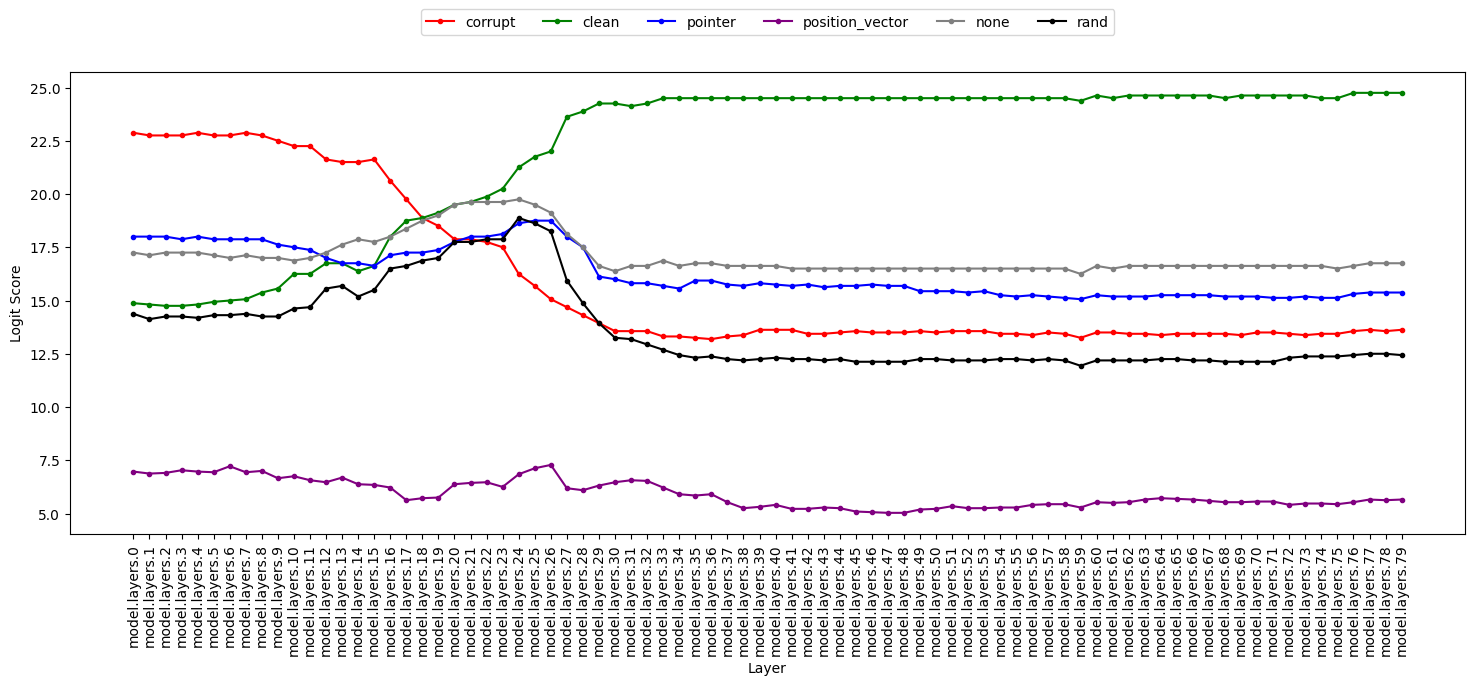

In [21]:
from matplotlib import pyplot as plt

METRIC = "logit"
scores = {obj_type: [] for obj_type in obj_track.keys()}
colors = {
    "corrupt": "red",
    "clean": "green",
    "pointer": "blue",
    "patch_type": "orange",
    "position_vector": "purple",
    "rand": "black",
    "none": "gray",
}

for layer_name, result in patching_results.items():
    track = result["track"]
    for obj_type in obj_track.keys():
        tok_id = obj_track[obj_type]["id"]
        s = getattr(track[tok_id][1], METRIC)
        scores[obj_type].append(s)

xkeys = list(patching_results.keys())
plt.figure(figsize=(18, 6))

for key in scores:
    plt.plot(xkeys, scores[key], label=key, marker='o', markersize=3, color=colors[key])


plt.xticks(rotation=90)
plt.xlabel("Layer")
plt.ylabel("Logit Score")

plt.legend(ncols=len(scores), loc="upper center", bbox_to_anchor=(0.5, 1.15))

plt.show()

In [45]:
# **scale up**
from src.selection.data import (
    SelectionPatchingResult_Multi,
    ObjectwiseResult,
    LayerwiseResult,
)
from src.utils import experiment_utils
from src.tokens import insert_padding_before_pos
from typing import Literal

######################################################################
N_RUNS = 100
N_DISTRACTORS = 5
WINDOW_SPEC = {
    mt.layer_name_format: 1,
    mt.mlp_module_name_format: 9,
    mt.attn_module_name_format: 9,
}
module_name_format = mt.layer_name_format
# module_name_format = mt.mlp_module_name_format
# module_name_format = mt.attn_module_name_format
# patch_on: Literal["pivot_entity", "predictive_tokens"] = "pivot_entity"
patch_on: Literal["pivot", "predictive"] = "predictive"


FILE_NAME_SPEC = {
    mt.layer_name_format: "residual",
    mt.mlp_module_name_format: "mlp",
    mt.attn_module_name_format: "attn",
}

file_suffix = ".json"
file_suffix = f"_{patch_on}_multi" + file_suffix
for key in FILE_NAME_SPEC:
    FILE_NAME_SPEC[key] += file_suffix

SAVE_DIR = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    mt.name.split("/")[-1],
    "patching_results",
    "pivot_entity",
)

save_step = 50
layer_step = 1
######################################################################

experiment_utils.set_seed(123456)

os.makedirs(SAVE_DIR, exist_ok=True)
run_idx = 0
patching_results = []


while run_idx < N_RUNS:
    run_idx += 1
    logger.info("#" * 100)
    logger.info(f"Run {run_idx}/{N_RUNS}")

    # get the samples
    patch_sample_1, clean_sample_2 = get_counterfactual_samples_on_pivot_entity()
    pointer_obj = clean_sample_2.options[patch_sample_1.obj_idx]
    logger.info(f"Pointer object: {pointer_obj}")

    patch_sample_2 = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        exclude_objs=[
            patch_sample_1.obj,
            clean_sample_2.obj,
            pointer_obj,
            patch_sample_1.subj,
        ],
        exclude_distractor_categories=[
            patch_sample_1.metadata["category"],
            clean_sample_2.metadata["category"],
        ],
    )

    clean_sample_1 = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        exclude_objs=[
            patch_sample_1.obj,
            patch_sample_2.obj,
            clean_sample_2.obj,
            pointer_obj,
            clean_sample_2.subj,
        ],
        exclude_distractor_categories=[
            patch_sample_1.metadata["category"],
            clean_sample_2.metadata["category"],
            patch_sample_2.metadata["category"],
        ],
    )

    # align patching positions
    aligned = align_patching_positions(
        mt=mt,
        prompt_template=" {}",
        clean_subj=clean_sample_2.subj,
        patched_subj=patch_sample_1.subj,
    )

    for clean_tok, patch_tok in zip(
        aligned["clean_input"]["input_ids"][0], aligned["patched_input"]["input_ids"][0]
    ):
        print(f'{mt.tokenizer.decode(clean_tok)} -> "{mt.tokenizer.decode(patch_tok)}"')

    aligned_patch_subj = mt.tokenizer.decode(
        aligned["patched_input"]["input_ids"][0][range(*aligned["subj_range"])],
        skip_special_tokens=False,
    )
    aligned_clean_subj = mt.tokenizer.decode(
        aligned["clean_input"]["input_ids"][0][range(*aligned["subj_range"])],
        skip_special_tokens=False,
    )

    check_prediction_consistency_on = {}
    check_prediction_consistency_on["patch_sample_1"] = (
        patch_sample_1.prompt.replace(" " + patch_sample_1.subj, aligned_patch_subj),
        patch_sample_1.obj,
    )

    patch_prompt = (
        patch_sample_1.prompt
        + f" {patch_sample_1.obj}"
        + "\n\n"
        + patch_sample_2.prompt
    )
    patch_prompt = patch_prompt.replace(" " + patch_sample_1.subj, aligned_patch_subj)
    print(patch_prompt, " >> ", patch_sample_2.obj)

    clean_prompt = (
        clean_sample_1.prompt
        + f" {clean_sample_1.obj}"
        + "\n\n"
        + clean_sample_2.prompt
    )
    clean_prompt = clean_prompt.replace(" " + clean_sample_2.subj, aligned_clean_subj)
    print(clean_prompt, " >> ", clean_sample_2.obj)

    check_prediction_consistency_on["clean_sample_2"] = (
        clean_prompt.replace(" " + clean_sample_2.subj, aligned_clean_subj),
        clean_sample_2.obj,
    )

    # check the predictions consistency
    skip_sample = False
    for key, (prompt, obj) in check_prediction_consistency_on.items():
        pred = predict_next_token(
            mt=mt,
            inputs=prompt,
        )[0]
        if pred[0].token_id != get_first_token_id(obj, mt.tokenizer, prefix=" "):
            logger.error(
                f'Prediction mismatch for {key}: {pred[0].token_id}["{mt.tokenizer.decode(pred[0].token_id)}"] != {get_first_token_id(obj, mt.tokenizer, prefix=" ")}["{mt.tokenizer.decode(get_first_token_id(obj, mt.tokenizer, prefix=" "))}"]'
            )
            skip_sample = True
            break
        logger.info(f"{key}, expected={obj} | prediction: {[str(p) for p in pred]}")

    if skip_sample:
        run_idx -= 1
        logger.info("Skipping this sample due to prediction mismatch.")
        continue
    
    # objects to track
    obj_track = {
        "corrupt": patch_sample_1.obj,
        "clean": clean_sample_2.obj,
        "pointer": pointer_obj,
        "position_vector": clean_sample_1.obj,
        "none": "None",
    }
    rand = random.choice(list(set(clean_sample_2.options) - set(obj_track.values())))
    obj_track["rand"] = rand

    for obj_type in obj_track:
        obj = obj_track[obj_type]
        obj_id = get_first_token_id(obj, mt.tokenizer, prefix=" ")
        obj_track[obj_type] = {
            "id": obj_id,
            "token": mt.tokenizer.decode(obj_id),
            "name": obj,
        }

    # tokenize and check alignments
    patch_tokenized = prepare_input(
        tokenizer=mt.tokenizer,
        prompts=patch_prompt,
        return_offsets_mapping=True,
    )
    patch_offsets = patch_tokenized.pop("offset_mapping")[0]
    patch_subj_range = find_token_range(
        string=patch_prompt,
        substring=aligned_patch_subj,
        tokenizer=mt.tokenizer,
        offset_mapping=patch_offsets,
        occurrence=0,
    )
    patch_subj_range = (
        patch_subj_range[0] + 1,  # +1 to skip added token for the space
        patch_subj_range[1],
    )
    print(
        f"Patch subject range: {patch_subj_range}, \"{mt.tokenizer.decode(patch_tokenized['input_ids'][0][patch_subj_range[0]:patch_subj_range[1]])}\""
    )

    clean_tokenized = prepare_input(
        tokenizer=mt.tokenizer,
        prompts=clean_prompt,
        return_offsets_mapping=True,
    )
    clean_offsets = clean_tokenized.pop("offset_mapping")[0]
    clean_subj_range = find_token_range(
        string=clean_prompt,
        substring=aligned_clean_subj,
        tokenizer=mt.tokenizer,
        offset_mapping=clean_offsets,
        occurrence=0,
    )
    clean_subj_range = (
        clean_subj_range[0] + 1,  # +1 to skip added token for the space
        clean_subj_range[1],
    )

    print(
        f"Clean subject range: {clean_subj_range}, \"{mt.tokenizer.decode(clean_tokenized['input_ids'][0][clean_subj_range[0]:clean_subj_range[1]])}\""
    )

    if patch_on == "pivot":
        patch_token_range = patch_subj_range
        clean_token_range = clean_subj_range
    elif patch_on == "predictive":
        patch_token_range = find_token_range(
            string=patch_prompt,
            substring="Ans:",
            tokenizer=mt.tokenizer,
            offset_mapping=patch_offsets,
            occurrence=0
        )
        clean_token_range = find_token_range(
            string=clean_prompt,
            substring="Ans:",
            tokenizer=mt.tokenizer,
            offset_mapping=clean_offsets,
            occurrence=-1
        )
    else:
        raise ValueError(f"Unknown patch_on value: {patch_on}")

    assert (clean_token_range[1] - clean_token_range[0]) == (
        patch_token_range[1] - patch_token_range[0]
    ), "Subject ranges must be of the same length for patching to work correctly."

    # cache the latents
    modules = [module_name_format.format(layer_idx) for layer_idx in range(mt.n_layer)]
    locations = list(product(modules, range(*patch_token_range)))
    logit_location = (mt.lm_head_name, -1)

    patch_hs = get_hs(
        mt=mt,
        input=patch_tokenized,
        locations=locations + [logit_location],
        return_dict=True,
    )

    # interventions
    layerwise_patching_results = {}
    for layer_idx in range(0, mt.n_layer, layer_step):
        patches = []
        for patch_tok_idx, clean_tok_idx in zip(
            range(*patch_token_range), range(*clean_token_range)
        ):
            patches.extend(
                [
                    PatchSpec(
                        location=(module_name, clean_tok_idx),
                        patch=patch_hs[(module_name, patch_tok_idx)],
                        strategy="replace",
                    )
                    for module_name in get_window(
                        module_name_format,
                        idx=layer_idx,
                        window_size=WINDOW_SPEC[module_name_format],
                        n_layer=mt.n_layer,
                    )
                ]
            )
        int_logit = get_hs(
            mt=mt,
            input=clean_tokenized,
            patches=patches,
            locations=[logit_location],
            return_dict=False,
        ).squeeze(0)

        pred, track = interpret_logits(
            logits=int_logit,
            tokenizer=mt.tokenizer,
            interested_tokens=[obj["id"] for obj in obj_track.values()],
        )

        objectwise_result = {}
        for obj_type in obj_track:
            obj_res = track[obj_track[obj_type]["id"]]
            objectwise_result[obj_type] = ObjectwiseResult(
                rank=obj_res[0], pred=obj_res[1]
            )
        layerwise_patching_results[module_name_format.format(layer_idx)] = (
            LayerwiseResult(predictions=pred, objs=objectwise_result)
        )
        # logger.debug(
        #     f"{module_name_format.format(layer_idx)}: {[str(p) for p in pred]} | track: {track}"
        # )

    patch_sample_1.detensorize()
    patch_sample_2.detensorize()
    clean_sample_1.detensorize()
    clean_sample_2.detensorize()

    patching_results.append(
        SelectionPatchingResult_Multi(
            patch_sample_1=patch_sample_1,
            patch_sample_2=patch_sample_2,
            patch_prompt=patch_prompt,
            clean_sample_1=clean_sample_1,
            clean_sample_2=clean_sample_2,
            clean_prompt=clean_prompt,
            results=layerwise_patching_results,
        )
    )

    if run_idx % save_step == 0 or run_idx == N_RUNS:
        save_file = os.path.join(
            SAVE_DIR,
            f"{FILE_NAME_SPEC[module_name_format]}",
        )

        with open(save_file, "w") as f:
            json.dump(
                [run.to_dict() for run in patching_results],
                f,
                indent=2,
            )

    logger.info(f"#" * 100)

2025-07-22 19:19:10 src.utils.experiment_utils INFO     setting all seeds to 123456
2025-07-22 19:19:10 __main__ INFO     ####################################################################################################
2025-07-22 19:19:10 __main__ INFO     Run 1/100
2025-07-22 19:19:10 __main__ INFO     Patch category: boxer, subject: Canelo Álvarez, object: Gervonta Davis
2025-07-22 19:19:10 __main__ INFO     Clean category: tennis player, subject: Carlos Alcaraz, object: Rafael Nadal
2025-07-22 19:19:10 __main__ INFO     patch_obj_idx=2 | ['Guillermo del Toro', 'Lionel Messi', 'Gervonta Davis', 'Yamiche Alcindor', 'Aziz Ansari', 'Rafael Nadal']
2025-07-22 19:19:10 __main__ INFO     clean_obj_idx=1 | ['Gervonta Davis', 'Rafael Nadal', 'Lionel Messi', 'Aziz Ansari', 'Yamiche Alcindor', 'Guillermo del Toro']


2025-07-22 19:19:11 __main__ INFO     Canelo Álvarez -> Gervonta Davis | pred=['" G"[480] (p=0.789, logit=20.250)', '" The"[578] (p=0.083, logit=18.000)', '" C"[356] (p=0.065, logit=17.750)', '" Guill"[74738] (p=0.010, logit=15.875)', '" Davis"[17200] (p=0.006, logit=15.375)']
2025-07-22 19:19:11 __main__ INFO     Carlos Alcaraz -> Rafael Nadal | pred=['" Rafael"[55500] (p=0.338, logit=17.875)', '" None"[2290] (p=0.159, logit=17.125)', '" Carlos"[30397] (p=0.124, logit=16.875)', '" The"[578] (p=0.097, logit=16.625)', '" G"[480] (p=0.043, logit=15.812)']
2025-07-22 19:19:11 __main__ INFO     Pointer object: Lionel Messi
<|begin_of_text|> -> "<|begin_of_text|>"
<|eot_id|> -> " C"
<|eot_id|> -> "anel"
 Carlos -> "o"
 Al -> " Á"
car -> "lv"
az -> "arez"
Which person from the following list has the profession in common with Canelo Álvarez?
Options: Guillermo del Toro, Lionel Messi, Gervonta Davis, Yamiche Alcindor, Aziz Ansari, Rafael Nadal
Ans: Gervonta Davis

Which person from the followi

In [46]:
os.listdir(SAVE_DIR)

['residual_predictive_multi.json', 'residual_pivot_multi.json']

In [47]:
with open(os.path.join(
    SAVE_DIR, 
    "residual_predictive_multi.json"),
"r") as f:
    patching_results_ld = json.load(f)
patching_results_ld = [
    SelectionPatchingResult_Multi.from_dict(run) for run in patching_results_ld
]
len(patching_results_ld)

100

In [48]:
#######################################################
patching_results = patching_results_ld
N_RUNS = len(patching_results)
#######################################################

2025-07-23 11:32:52 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-23 11:32:52 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-23 11:32:52 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-23 11:32:52 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-23 11:32:52 matplotlib.category INFO

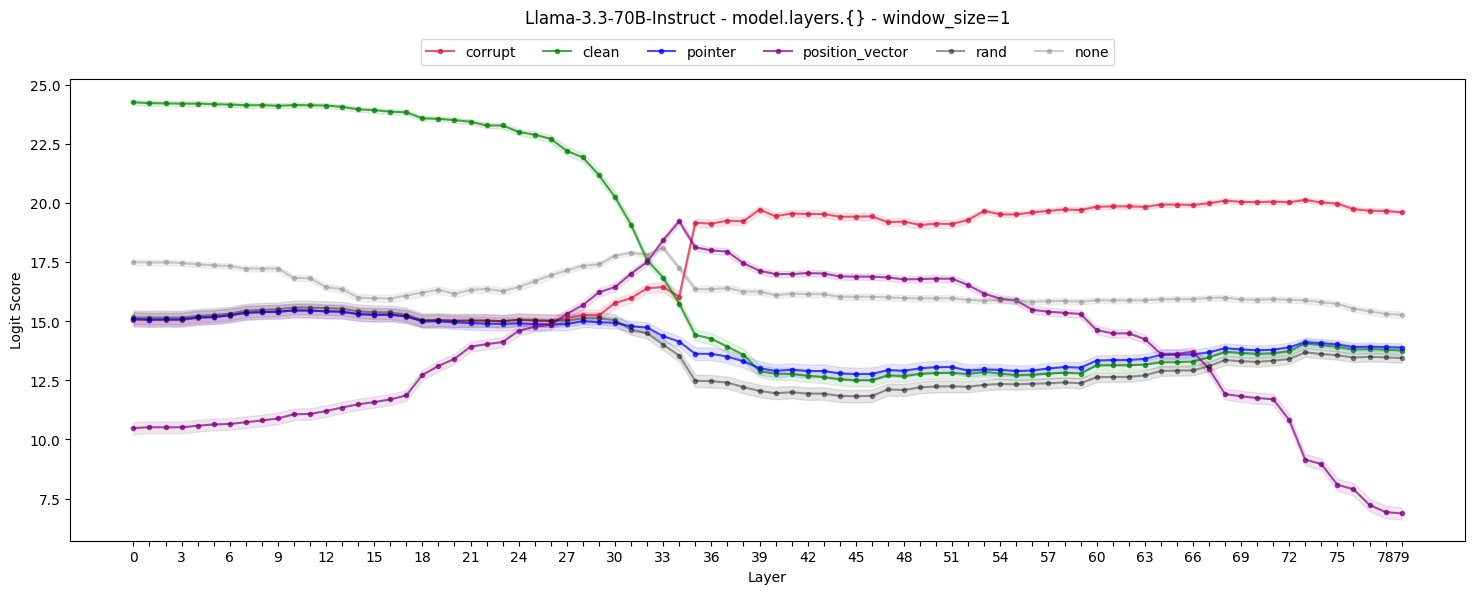

In [49]:
from matplotlib import pyplot as plt

##############################################
METRIC = "logit"
colors = {
    "corrupt": "crimson",
    "clean": "green",
    "pointer": "blue",
    # "patch_type": "#FF4500",
    "position_vector": "purple",
    "rand": "black",
    "none": "gray",
}
##############################################

all_scores = {obj_type: [] for obj_type in colors.keys()}
x_keys = list(patching_results_ld[0].results.keys())
x_keys = [key.split(".")[-1] for key in x_keys]

def get_tick_labels(ticks, step=5):
    return [
        tick if (i % step == 0 or i == len(ticks) - 1) else ""
        for i, tick in enumerate(ticks)
    ]

for run in patching_results_ld:
    run_score = {obj_type: [] for obj_type in all_scores.keys()}
    for layer_name, result in run.results.items():
        track = result.objs
        for obj_type in run_score.keys():
            run_score[obj_type].append(
                getattr(track[obj_type].pred, METRIC)
            )
    for obj_type in all_scores.keys():
        all_scores[obj_type].append(run_score[obj_type])

for obj_type in all_scores.keys():
    all_scores[obj_type] = torch.tensor(all_scores[obj_type])

plt.figure(figsize=(18, 6))
for key in all_scores:
    plt.plot(
        x_keys,
        all_scores[key].mean(dim=0).numpy(),
        label=key,
        marker="o",
        markersize=3,
        color=colors[key],
        alpha=0.7 if key not in ["none", "rand"] else 0.4,
    )
    std_err = all_scores[key].std(dim=0).numpy() / (N_RUNS ** 0.5)
    plt.fill_between(
        x_keys,
        all_scores[key].mean(dim=0).numpy() - std_err,
        all_scores[key].mean(dim=0).numpy() + std_err,
        alpha=0.1,
        color=colors[key],
    )

plt.xticks(x_keys, labels=get_tick_labels(x_keys, step=3), rotation=0)
plt.xlabel("Layer")
plt.ylabel(f"{METRIC.capitalize()} Score")

plt.title(f"{mt.name.split('/')[-1]} - {module_name_format} - window_size={WINDOW_SPEC[module_name_format]}", pad=40)
plt.legend(ncols=len(all_scores), loc="upper center", bbox_to_anchor=(0.5, 1.10))

plt.show()

## Testing with Synthetic Entities

In [ ]:
from src.selection.data import SelectionSample, get_random_sample

sample = get_random_sample(
    people_by_category = people_by_category,
    mt = mt,
    n_distractors=5,
    get_alt_obj=True,
    category="actor",
    # obj_idx=3,
    filter_by_lm_prediction=True
)
print(sample)
sample.prediction

In [ ]:
from src.functional import generate_with_patch

synth_entity = "Ali Rezaei"
# synth_entity = "Takeshi Yamamoto"

prompts = [
    "{} is by profession a",
]

for prompt in prompts:
    gen = generate_with_patch(
        mt = mt,
        inputs = prompt.format(synth_entity),
        n_gen_per_prompt=1,
        remove_prefix=True,
        do_sample=False,
    )[0]
    print(f"{prompt.format(synth_entity)} >> {gen}")

In [ ]:
sample.options[sample.obj_idx] = synth_entity
print(sample.prompt)

In [ ]:
generate_with_patch(
    mt = mt,
    inputs = sample.prompt,
    n_gen_per_prompt=1,
    remove_prefix=True,
    do_sample=False,
)[0]

In [ ]:
name = "Rachel Levy"
generate_with_patch(
    mt = mt,
    inputs = f"What is the hobby of {name}? Ans:",
    n_gen_per_prompt=1,
    remove_prefix=True,
    do_sample=False,
)

In [ ]:
# prompt = f"""Which person from the following list share the same hobby with {name}?
# David Cohen, Maria Santos, Ali Rezaei, Vera Wang, Fatima Sheikh, Taylor Swift.
# Ans:"""

prompt = f"""Which person from the following list share the same favorite food with Zahra Hosseini?
David Cohen, Maria Santos, Ali Rezaei, Vera Wang, Fatima Sheikh, Taylor Swift.
Ans:"""

generate_with_patch(
    mt = mt,
    inputs = prompt,
    n_gen_per_prompt=1,
    remove_prefix=True,
    do_sample=False,
)[0]